# 3-Hour Lab Plan: Hands-On Scientific Computing Environment Setting Up 
### Overview
 - **Objective**: Teach students to set up a scientific computing environment on a Linux server, use JupyterLab for visualization, and apply optimization techniques.
 - **Duration**: 3 hours, 5 sections
 - **Prerequisites**: Basic Python knowledge, access to school Linux server credentials.

 ## Lab Schedule

 Ref: 
 - https://github.com/jhihsheng/nano-optics/blob/master/OTID/connection_ssh.md
- https://github.com/jhihsheng/nano-optics/blob/master/OTID/OTID_plot.ipynb

1. Setting Up SSH Connection (20 minutes)
2. Setting Up Conda, JupyterLab, and Tunnelling (40 minutes)
3. Installing MEEP with Python (20 minutes)
4. Plotting with Matplotlib in Jupyter Notebook (50 minutes)
5. 1D Optimization with SciPy (50 minutes)

Notes for TA
- Pre-test all commands on the server.
- Write main commands on the blackboard.
- During teaching, pause and see if students have any problems. Cruise and check their progress 
- Check if students successfully install meep. Let them use "conda activate mp" and maybe run an example
- Encourage students to experiment and ask questions.
- Record any issues and feebacks from teaching. Think how to improve the lab next time.


## 1D Optimization with SciPy (50 minutes)
 - Goal: Teach students to apply Golden Section, Fibonacci, Bisection, and Newton’s methods for 1D optimization using SciPy and a custom example.
 - Steps: 
  1. Ensure `SciPy` is installed. Check with `conda list`.
  2. Install with `conda install scipy`
  3. Use jupyterlab to run some examples
- Time: 20 min demo + 30 min student practice
###
Demo Planing (20 minutes)

- Function to Optimize: Use 
$f(x)=x^2+4\sin(x)$ for all methods (unimodal in a reasonable interval, with a minimum).
- TA Explanation: Briefly introduce each method: Golden Section: Iterative interval reduction using the golden ratio.
- Fibonacci: Similar to Golden Section but uses Fibonacci numbers for interval steps.
- Bisection: Uses the derivative’s sign to halve the interval (requires derivative).
- Newton’s: Uses first and second derivatives for quadratic approximation (fast but sensitive).

## Example 1: Golden Section Search (SciPy)

Golden Section: Minimum at x = -1.0299, f(x) = -2.3683


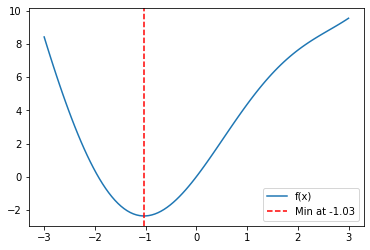

In [1]:
from scipy.optimize import minimize_scalar
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 4 * np.sin(x)

# Golden Section Search
result = minimize_scalar(f, method='golden', bracket=(-2, 0, 2))
print(f"Golden Section: Minimum at x = {result.x:.4f}, f(x) = {result.fun:.4f}")

# Plot
x = np.linspace(-3, 3, 100)
y = f(x)
plt.plot(x, y, label='f(x)')
plt.axvline(result.x, color='r', linestyle='--', label=f'Min at {result.x:.2f}')
plt.legend()
plt.show()

## Example 2: Fibonacci Search (Custom Implementation)
Play with $n$ to see how large it is for converging 

In [4]:
def fibonacci_search(f, a, b, n=10):
    # Simple Fibonacci sequence
    fib = [0, 1]
    for _ in range(n-2):
        fib.append(fib[-1] + fib[-2])
    
    x1, x2 = a, b
    for k in range(n-2, 1, -1):
        L = b - a
        rho = fib[k-1] / fib[k]
        x1 = a + (1 - rho) * L
        x2 = a + rho * L
        if f(x1) > f(x2):
            a = x1
        else:
            b = x2
    return (a + b) / 2

# Test Fibonacci Search
x_min = fibonacci_search(f, -2, 2)
print(f"Fibonacci: Minimum at x = {x_min:.4f}, f(x) = {f(x_min):.4f}")

Fibonacci: Minimum at x = -1.1429, f(x) = -2.3332


## Example 3: Bisection Method (Custom with Derivative)

How many steps required to reach the tolerance (`tol=1e-5`)? Is the step number smaller than that of the previous methods?

Can  you write an analytical derivative function instead of using numerical derivative?

In [9]:
from scipy.misc import derivative

def bisection_search(f, a, b, tol=1e-5):
    while (b - a) > tol:
        mid = (a + b) / 2
        df_mid = derivative(f, mid, dx=1e-6)  # Numerical derivative
        if abs(df_mid) < tol:  # Close to zero derivative
            return mid
        elif df_mid > 0:
            b = mid
        else:
            a = mid
    return (a + b) / 2

# Test Bisection
x_min = bisection_search(f, -2, 2)
print(f"Bisection: Minimum at x = {x_min:.4f}, f(x) = {f(x_min):.4f}")

Bisection: Minimum at x = -1.0299, f(x) = -2.3683


## Example 4: Newton’s Method (SciPy)

In [10]:
from scipy.optimize import newton

def f_prime(x):  # First derivative
    return 2 * x + 4 * np.cos(x)

def f_double_prime(x):  # Second derivative
    return 2 - 4 * np.sin(x)

# Newton's Method
x_min = newton(f_prime, x0=0, fprime=f_double_prime)
print(f"Newton: Minimum at x = {x_min:.4f}, f(x) = {f(x_min):.4f}")

Newton: Minimum at x = -1.0299, f(x) = -2.3683


Student Practice (30 mins)
- Task
    1. Test the methods on $g(x) = x^4 - 5 x^2 + 3$
    2. Use the Newton's method to find the minimizer and minimum in the interval $[-2,2]$
    3. Plot $g(x)$ with the minimum marked. 